<a href="https://colab.research.google.com/github/0v3r-9000/trc204.github.io/blob/main/Placement%20/%20College_Placement_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract

This project addresses the problem of predicting college student placement using a Decision Tree classification model. Leveraging a dataset containing various student attributes such as IQ, previous semester results, CGPA, academic performance, internship experience, extra-curricular scores, communication skills, and projects completed, the study aims to build a predictive model to identify students likely to be placed. The initial model demonstrated perfect performance metrics on the training data, suggesting significant overfitting. To mitigate this, the Decision Tree's maximum depth was constrained. The data was preprocessed using Label Encoding for the target variable and One-Hot Encoding for categorical features. The dataset was split into training and testing sets, and the Decision Tree model was trained and evaluated using accuracy, precision, recall, and F1-score. Cross-validation was also employed to assess the model's generalization ability. The findings highlight the importance of addressing overfitting in Decision Tree models for reliable placement prediction.

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vrajesh0sharma7_college_student_placement_path = kagglehub.dataset_download('vrajesh0sharma7/college-student-placement')

print('Data source import complete.')


Using Colab cache for faster access to the 'college-student-placement' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-student-placement/CollegePlacement.csv


In [3]:
df = pd.read_csv('/kaggle/input/college-student-placement/CollegePlacement.csv').drop(columns='College_ID')

In [4]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [5]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 20)

Unique values in 'Internship_Experience':
['No' 'Yes']
--------------------
Unique values in 'Placement':
['No' 'Yes']
--------------------


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier





In [10]:
from sklearn.preprocessing import LabelEncoder

target = 'Placement'
categorical_cols = ['Internship_Experience']

# Encode the target variable
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Encode the categorical features
for col in categorical_cols:
    le_cat = LabelEncoder()
    df[col] = le_cat.fit_transform(df[col])


# Define X and y using the already processed columns
# The one-hot encoded columns for 'Internship_Experience' should now be 'Internship_No' and 'Internship_Yes'
# Drop the original 'Internship_Experience_Original' column and the target column
X = df.drop(columns=[target])
y = df[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

Accuracy: 0.965
Precision: 0.8502673796791443
Recall: 0.9578313253012049
F1 Score: 0.9008498583569405


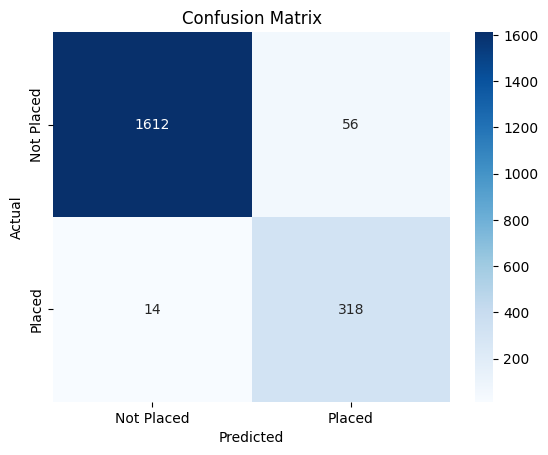

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv('/kaggle/input/college-student-placement/CollegePlacement.csv').drop(columns='College_ID')

# Encode target
target = 'Placement'
le = LabelEncoder()
df[target] = le.fit_transform(df[target])  # Placed=1, Not Placed=0

# One-hot encode Internship_Experience (since it's categorical, not ordinal)
ohe = OneHotEncoder(drop='first', sparse_output=False) # Set sparse_output to False for a dense array
internship_encoded = pd.DataFrame(
    ohe.fit_transform(df[['Internship_Experience']]),
    columns=ohe.get_feature_names_out(['Internship_Experience']),
    index=df.index
)
df = pd.concat([df.drop(columns=['Internship_Experience']), internship_encoded], axis=1)

# Split features and target
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model - Added max_depth for tuning
model = DecisionTreeClassifier(random_state=42, max_depth=3) # You can change the value of max_depth
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1, zero_division=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Placed", "Placed"],
            yticklabels=["Not Placed", "Placed"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Visualize the Decision Tree

We can visualize the trained Decision Tree to understand its structure and see how it's making decisions. A very complex tree is often a sign of overfitting.

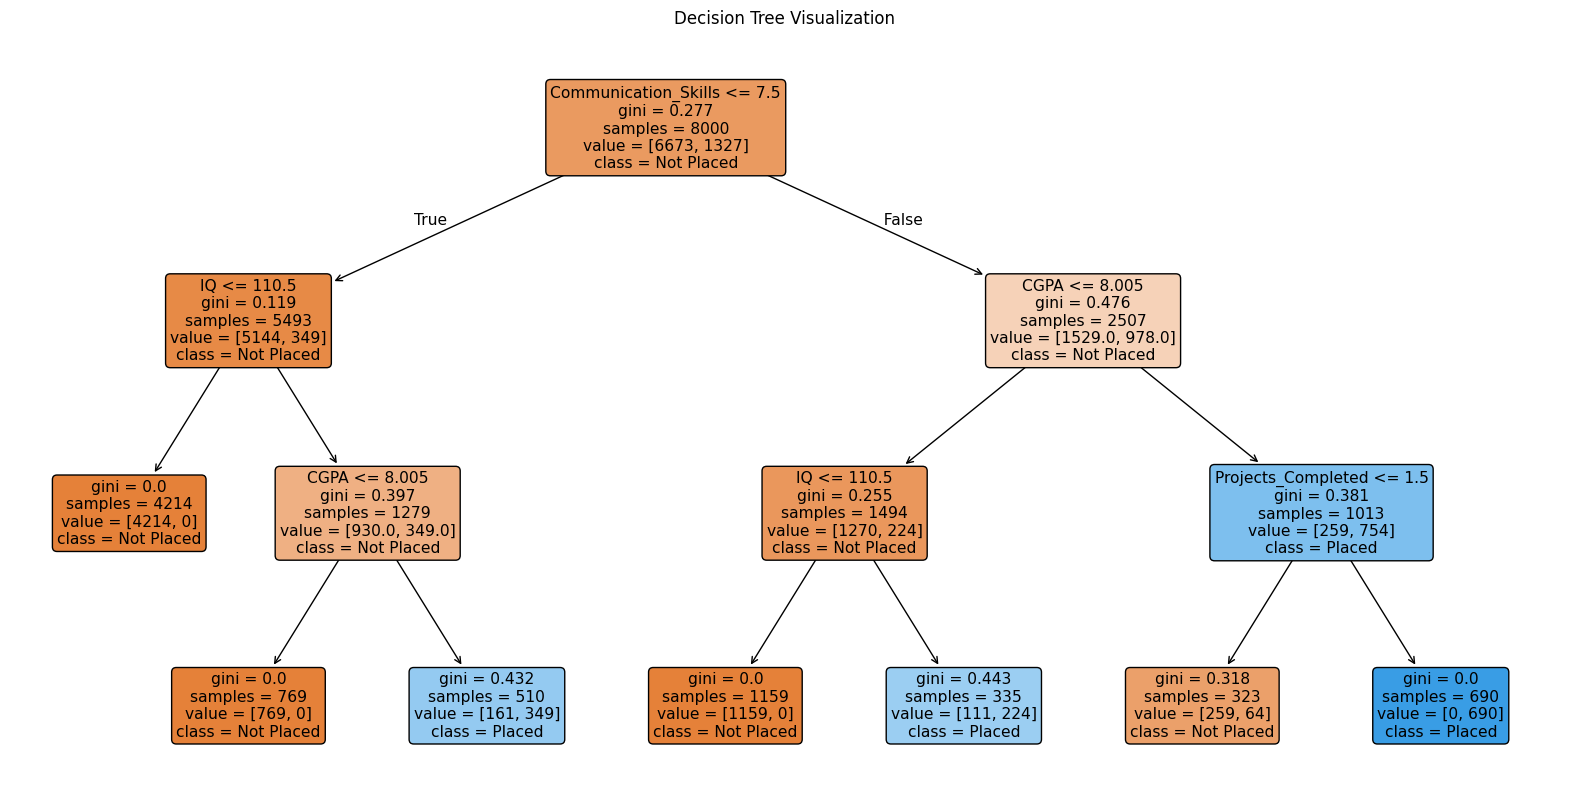

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Placed', 'Placed'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Evaluate with Cross-Validation

Cross-validation is a technique to evaluate the model's performance more robustly by training and testing it on different subsets of the data. This helps to get a better estimate of how the model will perform on unseen data and can highlight overfitting if the cross-validation scores are significantly lower than the training scores.

In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-validation Accuracy:", cv_scores.std())

Cross-validation Accuracy Scores: [0.9595 0.9575 0.958  0.958  0.964 ]
Mean Cross-validation Accuracy: 0.9594000000000001
Standard Deviation of Cross-validation Accuracy: 0.0023958297101421815
